### ***ESTIMATED DATA ANALYSIS OF THE HR EMPLOYEE ATTRITION DATA AND PERFORMANCE***

In [1]:
# Library for Data Manipulation
import numpy as np
import pandas as pd

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

%matplotlib inline


In [2]:
# Load the dataset into the dataframe
df = pd.read_csv('../data/refined_employee_data.csv')

### ***Check the General Properties of table***

In [3]:
print(df.shape)
print(df.columns)
df.head()

(1470, 32)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,80,No Stock Options,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,80,Low Stock Options,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,80,No Stock Options,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,80,No Stock Options,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,80,Low Stock Options,6,3,Better,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### **Inference** : 
    - The Dataset has 26 Numerical Features
    - The Dataset has 9 categorical_col_col_col_col_col_col Attributes as seen

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StandardHours,1470.0,80.000000,0.000000,80.0,80.0,80.0,80.00,80.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0


### ***Inference*** : 
- Check for missing values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### ***Inference*** : 
- There are no missing or nan values.
- If there were then we would need to handle that with the help of ***imputers***.



### ***Convert Ordinal Data back to Numerical Data***

In [7]:
# Reverse the transformations
df["Education"] = df["Education"].replace(
    {"Below College": 1, "College": 2, "Bachelor": 3, "Master": 4, "Doctor": 5}
)
df["EnvironmentSatisfaction"] = df[
    "EnvironmentSatisfaction"
].replace({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})
df["JobInvolvement"] = df["JobInvolvement"].replace(
    {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
)
df["JobLevel"] = df["JobLevel"].replace(
    {
        "Entry Level": 1,
        "Junior Level": 2,
        "Mid Level": 3,
        "Senior Level": 4,
        "Executive Level": 5,
    }
)
df["JobSatisfaction"] = df["JobSatisfaction"].replace(
    {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
)
df["PerformanceRating"] = df["PerformanceRating"].replace(
    {"Low": 1, "Good": 2, "Excellent": 3, "Outstanding": 4}
)
df["RelationshipSatisfaction"] = df[
    "RelationshipSatisfaction"
].replace({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace(
    {"Bad": 1, "Good": 2, "Better": 3, "Best": 4}
)
df["StockOptionLevel"] = df["StockOptionLevel"].replace(
    {
        "No Stock Options": 0,
        "Low Stock Options": 1,
        "Medium Stock Options": 2,
        "High Stock Options": 3,
    }
)

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


### Example Code to Handle Missing Values:
```python
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data with missing values
data = {
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, None, 5],
    'C': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Create a SimpleImputer instance with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform the data
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:\n", df)
print("\nImputed DataFrame:\n", df_imputed)

---------------------------------------------------------------

### ***Filtering the Numerical, categorical_col_col and the Ordinal Features***

In [9]:
# Assuming df is your DataFrame
dependent_col = "Attrition"
categorical_col = df.select_dtypes(exclude=[np.number]).columns
categorical_col = categorical_col.drop(dependent_col)
numerical_col = df.select_dtypes(include=[np.number]).columns

ordinal_col = [
    "Education",
    "EnvironmentSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "JobSatisfaction",
    "NumCompaniesWorked",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance",
]

# Remove ordinal columns from numerical columns
numerical_col = numerical_col.difference(ordinal_col)

print("Categorical columns=", categorical_col.to_list())
print("Numerical columns=", numerical_col.to_list())
print("Ordinal columns=", ordinal_col)

print(len(categorical_col) + len(numerical_col) + len(ordinal_col))



Categorical columns= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical columns= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Ordinal columns= ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
31


### Inference:
- The numerical, categorical_col, and ordinal features are separated.
  - Numerical features include continuous data.
  - categorical_col features include discrete data.
  - Ordinal features include ordered data.
- Now we can apply appropriate normalization to them.

# ***Check for outliers in continuous Numerical Data***


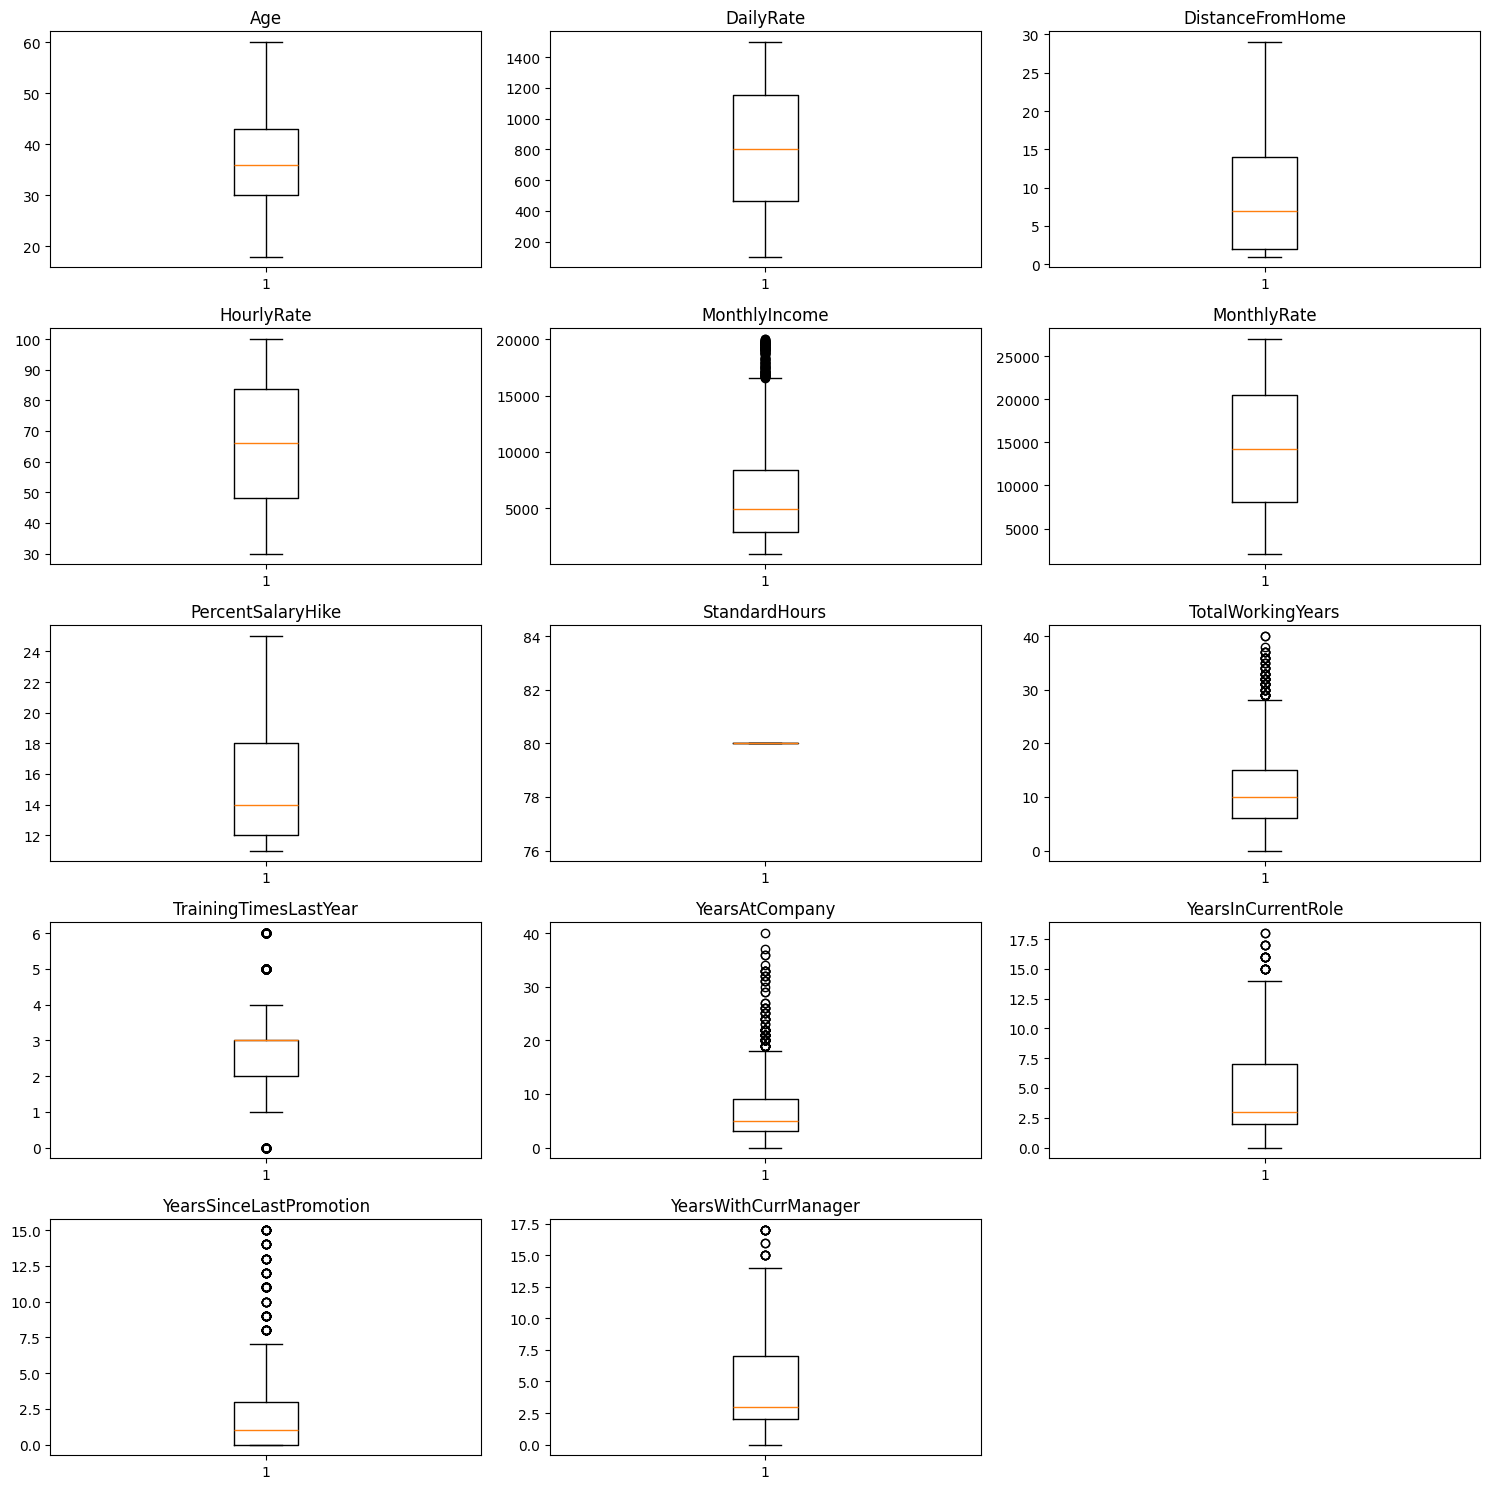

In [10]:
import matplotlib.pyplot as plt

# Number of columns for subplots
num_cols = 3
# Calculate the number of rows needed
num_rows = (len(numerical_col) // num_cols) + 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Plot each numerical column in a separate subplot
for i, column in enumerate(numerical_col):
    axs[i].boxplot(df[column])
    axs[i].set_title(column)

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()

## ***Inference*** 

***In this dataset, we don't have any missing values, but if there are missing values (most of the cases there are), we need to Impute/Drop the missing values according to the following Strategy.***

When dealing with missing values, choosing the right imputation strategy is crucial. Here are some guidelines:

- **Outliers Present**: If there are many outliers, choose `strategy: median`.
- **Compact Data**: If the data is compact, choose `strategy: mean`.
- **K-Nearest Neighbors (KNN) Imputer**: A powerful method for handling missing values. Here are some reasons to choose KNN imputer:

### Why Choose KNN Imputer?

- **Utilizes Similarity**: Fills in missing values by considering the values of the nearest neighbors, using the similarity between data points for more informed imputations.
- **Handles Non-linear Relationships**: Unlike mean or median imputation, KNN can capture non-linear relationships between features, leading to more accurate imputations.
- **Preserves Data Distribution**: By using actual observed values from similar data points, KNN imputation is more likely to preserve the original distribution and variability of the data.
- **Flexible and Adaptive**: Can adapt to different types of data and missing patterns, suitable for both numerical and categorical data.
- **Reduces Bias**: Mean or median imputation can introduce bias, especially if the data is not symmetrically distributed. KNN imputation reduces this risk by using actual data points for imputation.

### When to Use KNN Imputer?

- **Complex Data**: When your data has complex relationships that simple imputation methods cannot capture.
- **Mixed Data Types**: When your dataset contains both numerical and categorical features.
- **Preserving Data Integrity**: When you want to preserve the original data distribution and reduce bias.

## ***Do one hot encoding of the Non-Ordinal Categorical Data***

In [11]:
for column in categorical_col:
    print(f"{column}: {df[column].unique()}")

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


Before Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder
df[categorical_col].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


After Encoding

In [13]:
import category_encoders as ce

# Initialize the OneHotEncoder with drop="first" and sparse_output=False
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

# Fit Transform the categorical columns
encoded_cols = one_hot_encoder.fit_transform(df[categorical_col])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(categorical_col))

# Add the encoded columns to the original DataFrame
df = pd.concat([df, encoded_df], axis = 1).drop(columns = categorical_col)

categorical_one_hot_encoded_cols = encoded_df.columns

df[categorical_one_hot_encoded_cols].head()



,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Normalize the Continuous Numerical Values

In [14]:
from sklearn.preprocessing import StandardScaler

# Check the continuous columns
df[numerical_col].sample(5)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1400,38,1444,1,88,2991,5224,11,80,7,2,6,2,1,2
442,36,635,10,32,9980,15318,14,80,10,3,10,3,9,7
833,27,199,6,55,2539,7950,13,80,4,0,4,2,2,2
1049,30,1358,16,96,5301,2939,15,80,4,2,2,1,2,2
308,58,390,1,32,5660,17056,13,80,12,2,5,3,1,2


Execute Normalization

In [15]:
normalizer = StandardScaler()

# Fit Transform
normalized_cols = normalizer.fit_transform(df[numerical_col])

# Create the dataframe with Normalized values
normalized_df = pd.DataFrame(normalized_cols, columns= numerical_col)

# normalized_df.head()

# Replace the original column with scaled values
df[numerical_col] = normalized_df

df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,Yes,0.742527,-1.010909,2,2,1.383138,3,2,4,-0.108350,0.726020,8,-1.150554,3,1,0.0,0,-0.421642,-2.171982,1,-0.164613,-0.063296,-0.679146,0.245834,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.322365,No,-1.297775,-0.147150,1,3,-0.240677,2,2,2,-0.291719,1.488876,1,2.129306,4,4,0.0,1,-0.164511,0.155707,3,0.488508,0.764998,-0.368715,0.806541,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.008343,Yes,1.414363,-0.887515,2,4,1.284725,2,1,3,-0.937654,-1.674841,6,-0.057267,3,2,0.0,0,-0.550208,0.155707,3,-1.144294,-1.167687,-0.679146,-1.155935,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.429664,No,1.461466,-0.764121,4,4,-0.486709,3,1,3,-0.763634,1.243211,1,-1.150554,3,3,0.0,0,-0.421642,0.155707,3,0.161947,0.764998,0.252146,-1.155935,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-1.086676,No,-0.524295,-0.887515,1,1,-1.274014,3,1,2,-0.644858,0.325900,9,-0.877232,3,4,0.0,1,-0.678774,0.155707,3,-0.817734,-0.615492,-0.058285,-0.595227,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Split the DataFrame into train, cv and split

In [16]:
# Import train test split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
cv_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

#EXport the DataFrames
train_df.to_csv('../data/train_data.csv', index=False)
cv_df.to_csv('../data/cv_data.csv', index=False)
test_df.to_csv('../data/test_data.csv', index=False)
